# パラメータの更新
## parameterの最適化手法

In [1]:
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
from common.optimizer import *

def f(x, y):
    return x**2 / 20.0 + y**2


def df(x, y):
    return x / 10.0, 2.0*y

init_pos = (-7.0, 2.0)
params = {}
params['x'], params['y'] = init_pos[0], init_pos[1]
grads = {}
grads['x'], grads['y'] = 0, 0


optimizers = OrderedDict()
optimizers["SGD"] = SGD(lr=0.95)
optimizers["Momentum"] = Momentum(lr=0.1)
optimizers["AdaGrad"] = AdaGrad(lr=1.5)
optimizers["Adam"] = Adam(lr=0.3)

idx = 1

for key in optimizers:
    optimizer = optimizers[key]
    x_history = []
    y_history = []
    params['x'], params['y'] = init_pos[0], init_pos[1]
    
    for i in range(30):
        x_history.append(params['x'])
        y_history.append(params['y'])
        
        grads['x'], grads['y'] = df(params['x'], params['y'])
        optimizer.update(params, grads)
    

    x = np.arange(-10, 10, 0.01)
    y = np.arange(-5, 5, 0.01)
    
    X, Y = np.meshgrid(x, y) 
    Z = f(X, Y)
    
    # for simple contour line  
    mask = Z > 7
    Z[mask] = 0
    
    # plot 
    plt.subplot(2, 2, idx)
    idx += 1
    plt.plot(x_history, y_history, 'o-', color="red")
    plt.contour(X, Y, Z)
    plt.ylim(-10, 10)
    plt.xlim(-10, 10)
    plt.plot(0, 0, '+')
    #colorbar()
    #spring()
    plt.title(key)
    plt.xlabel("x")
    plt.ylabel("y")
    
plt.show()

===========iteration:0===========
SGD:2.4524464444495955
Momentum:2.3370126289245445
AdaGrad:2.0242659710388633
Adam:2.177398150069283
===========iteration:100===========
SGD:1.5097928400654324
Momentum:0.42850362776667067
AdaGrad:0.12002177341746978
Adam:0.25377562048756463
===========iteration:200===========
SGD:0.8453831510466849
Momentum:0.276210461303572
AdaGrad:0.15501693603419453
Adam:0.23042997412637375
===========iteration:300===========
SGD:0.47605906001239195
Momentum:0.12629454113427027
AdaGrad:0.054849667057270804
Adam:0.08024241697850507
===========iteration:400===========
SGD:0.38637443627723633
Momentum:0.17157537558470815
AdaGrad:0.06361675040626086
Adam:0.1031017395081906
===========iteration:500===========
SGD:0.36177700833927917
Momentum:0.14922464553447978
AdaGrad:0.05137115727301537
Adam:0.07699911265560952
===========iteration:600===========
SGD:0.43018531392475545
Momentum:0.21402421023004928
AdaGrad:0.0865143547382336
Adam:0.14631404560243433
===========iterati

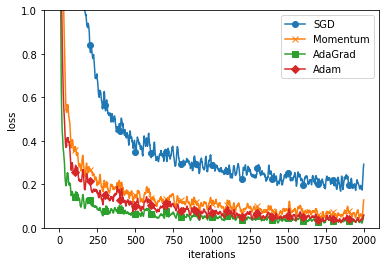

In [2]:
# coding: utf-8
import os
import sys
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import *


# 0:MNISTデータの読み込み==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1:実験の設定==========
optimizers = {}
optimizers['SGD'] = SGD()
optimizers['Momentum'] = Momentum()
optimizers['AdaGrad'] = AdaGrad()
optimizers['Adam'] = Adam()
#optimizers['RMSprop'] = RMSprop()

networks = {}
train_loss = {}
for key in optimizers.keys():
    networks[key] = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100, 100, 100],
        output_size=10)
    train_loss[key] = []    


# 2:訓練の開始==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print( "===========" + "iteration:" + str(i) + "===========")
        for key in optimizers.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3.グラフの描画==========
markers = {"SGD": "o", "Momentum": "x", "AdaGrad": "s", "Adam": "D"}
x = np.arange(max_iterations)
for key in optimizers.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 1)
plt.legend()
plt.show()

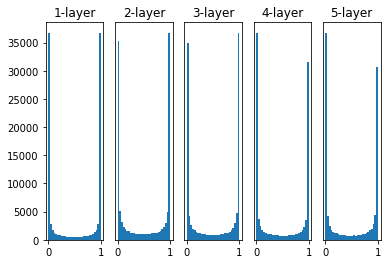

In [3]:
# coding: utf-8
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ReLU(x):
    return np.maximum(0, x)


def tanh(x):
    return np.tanh(x)
    
input_data = np.random.randn(1000, 100)  # 1000個のデータ
node_num = 100  # 各隠れ層のノード（ニューロン）の数
hidden_layer_size = 5  # 隠れ層が5層
activations = {}  # ここにアクティベーションの結果を格納する

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 初期値の値をいろいろ変えて実験しよう！
    w = np.random.randn(node_num, node_num) * 1
    # w = np.random.randn(node_num, node_num) * 0.01
    # w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    # w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)


    a = np.dot(x, w)


    # 活性化関数の種類も変えて実験しよう！
    z = sigmoid(a)
    # z = ReLU(a)
    # z = tanh(a)

    activations[i] = z

# ヒストグラムを描画
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

* 偏ったデータセットに対しては勾配消失や表現力の制限が問題になって学習がうまくいかない。

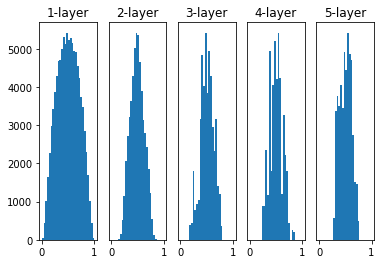

In [4]:
# coding: utf-8
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ReLU(x):
    return np.maximum(0, x)


def tanh(x):
    return np.tanh(x)
    
input_data = np.random.randn(1000, 100)  # 1000個のデータ
node_num = 100  # 各隠れ層のノード（ニューロン）の数
hidden_layer_size = 5  # 隠れ層が5層
activations = {}  # ここにアクティベーションの結果を格納する

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 初期値の値をいろいろ変えて実験しよう！
    w = np.random.randn(node_num, node_num)/np.sqrt(node_num)
    # w = np.random.randn(node_num, node_num) * 0.01
    # w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    # w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)


    a = np.dot(x, w)


    # 活性化関数の種類も変えて実験しよう！
    z = sigmoid(a)
    # z = ReLU(a)
    # z = tanh(a)

    activations[i] = z

# ヒストグラムを描画
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()0227


===========iteration:0===========
std=0.01:2.3025044024108516
Xavier:2.321213958370702
He:2.3849587595584634
===========iteration:100===========
std=0.01:2.3023305514304093
Xavier:2.2694054411405133
He:1.2326144103039014
===========iteration:200===========
std=0.01:2.301361050020425
Xavier:2.1565653777750784
He:0.6429380361211499
===========iteration:300===========
std=0.01:2.3027288876587595
Xavier:1.9278019916917648
He:0.45342440119968797
===========iteration:400===========
std=0.01:2.298770741562837
Xavier:1.4295223564633317
He:0.33182749919648935
===========iteration:500===========
std=0.01:2.301618081670609
Xavier:1.0015887232275893
He:0.4311387891762169
===========iteration:600===========
std=0.01:2.299245578742781
Xavier:0.5852838387538516
He:0.2491148313524315
===========iteration:700===========
std=0.01:2.299948919970048
Xavier:0.5991571529247304
He:0.2826085794145078
===========iteration:800===========
std=0.01:2.300900407562575
Xavier:0.5211753496098072
He:0.2861982265244350

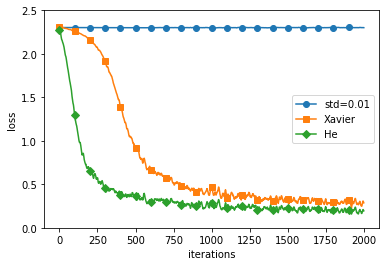

In [5]:
# coding: utf-8
import os
import sys

sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD


# 0:MNISTデータの読み込み==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1:実験の設定==========
weight_init_types = {'std=0.01': 0.01, 'Xavier': 'sigmoid', 'He': 'relu'}
optimizer = SGD(lr=0.01)

networks = {}
train_loss = {}
for key, weight_type in weight_init_types.items():
    networks[key] = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100],
                                  output_size=10, weight_init_std=weight_type)
    train_loss[key] = []


# 2:訓練の開始==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in weight_init_types.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizer.update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print("===========" + "iteration:" + str(i) + "===========")
        for key in weight_init_types.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3.グラフの描画==========
markers = {'std=0.01': 'o', 'Xavier': 's', 'He': 'D'}
x = np.arange(max_iterations)
for key in weight_init_types.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 2.5)
plt.legend()
plt.show()

## Batch normalization 

============== 1/16 ==============
epoch:0 | 0.099 - 0.152


../common/multi_layer_net_extend.py:101: RuntimeWarning: overflow encountered in square
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
../common/multi_layer_net_extend.py:101: RuntimeWarning: invalid value encountered in double_scalars
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
../common/functions.py:34: RuntimeWarning: invalid value encountered in subtract
  x = x - np.max(x, axis=0)
../common/layers.py:12: RuntimeWarning: invalid value encountered in less_equal
  self.mask = (x <= 0)
/Users/Kohei/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


epoch:1 | 0.097 - 0.162
epoch:2 | 0.097 - 0.143
epoch:3 | 0.097 - 0.146
epoch:4 | 0.097 - 0.161
epoch:5 | 0.097 - 0.175
epoch:6 | 0.097 - 0.187
epoch:7 | 0.097 - 0.208
epoch:8 | 0.097 - 0.227
epoch:9 | 0.097 - 0.249
epoch:10 | 0.097 - 0.273
epoch:11 | 0.097 - 0.286
epoch:12 | 0.097 - 0.302
epoch:13 | 0.097 - 0.322
epoch:14 | 0.097 - 0.339
epoch:15 | 0.097 - 0.356
epoch:16 | 0.097 - 0.377
epoch:17 | 0.097 - 0.394
epoch:18 | 0.097 - 0.402


No handles with labels found to put in legend.


epoch:19 | 0.097 - 0.421
============== 2/16 ==============
epoch:0 | 0.105 - 0.109
epoch:1 | 0.097 - 0.118
epoch:2 | 0.097 - 0.152
epoch:3 | 0.097 - 0.181
epoch:4 | 0.097 - 0.211
epoch:5 | 0.097 - 0.241
epoch:6 | 0.097 - 0.282
epoch:7 | 0.097 - 0.298
epoch:8 | 0.097 - 0.322
epoch:9 | 0.097 - 0.34
epoch:10 | 0.097 - 0.353
epoch:11 | 0.097 - 0.383
epoch:12 | 0.097 - 0.4
epoch:13 | 0.097 - 0.421
epoch:14 | 0.097 - 0.43
epoch:15 | 0.097 - 0.445
epoch:16 | 0.097 - 0.453
epoch:17 | 0.097 - 0.474
epoch:18 | 0.097 - 0.496


No handles with labels found to put in legend.


epoch:19 | 0.097 - 0.512
============== 3/16 ==============
epoch:0 | 0.142 - 0.113
epoch:1 | 0.247 - 0.145
epoch:2 | 0.383 - 0.179
epoch:3 | 0.467 - 0.228
epoch:4 | 0.506 - 0.254
epoch:5 | 0.568 - 0.294
epoch:6 | 0.622 - 0.321
epoch:7 | 0.645 - 0.366
epoch:8 | 0.692 - 0.404
epoch:9 | 0.728 - 0.432
epoch:10 | 0.747 - 0.452
epoch:11 | 0.77 - 0.476
epoch:12 | 0.784 - 0.506
epoch:13 | 0.797 - 0.528
epoch:14 | 0.826 - 0.563
epoch:15 | 0.835 - 0.575
epoch:16 | 0.856 - 0.599
epoch:17 | 0.875 - 0.615
epoch:18 | 0.892 - 0.628


No handles with labels found to put in legend.


epoch:19 | 0.886 - 0.646
============== 4/16 ==============
epoch:0 | 0.093 - 0.114
epoch:1 | 0.18 - 0.098
epoch:2 | 0.326 - 0.152
epoch:3 | 0.425 - 0.218
epoch:4 | 0.48 - 0.29
epoch:5 | 0.55 - 0.355
epoch:6 | 0.594 - 0.401
epoch:7 | 0.631 - 0.445
epoch:8 | 0.663 - 0.508
epoch:9 | 0.696 - 0.554
epoch:10 | 0.71 - 0.603
epoch:11 | 0.744 - 0.643
epoch:12 | 0.759 - 0.676
epoch:13 | 0.768 - 0.706
epoch:14 | 0.782 - 0.734
epoch:15 | 0.787 - 0.762
epoch:16 | 0.808 - 0.777
epoch:17 | 0.815 - 0.791
epoch:18 | 0.839 - 0.804


No handles with labels found to put in legend.


epoch:19 | 0.84 - 0.818
============== 5/16 ==============
epoch:0 | 0.085 - 0.123
epoch:1 | 0.092 - 0.17
epoch:2 | 0.095 - 0.283
epoch:3 | 0.105 - 0.414
epoch:4 | 0.13 - 0.53
epoch:5 | 0.141 - 0.59
epoch:6 | 0.158 - 0.65
epoch:7 | 0.17 - 0.696
epoch:8 | 0.181 - 0.727
epoch:9 | 0.162 - 0.75
epoch:10 | 0.18 - 0.765
epoch:11 | 0.186 - 0.778
epoch:12 | 0.198 - 0.805
epoch:13 | 0.193 - 0.816
epoch:14 | 0.224 - 0.831
epoch:15 | 0.244 - 0.839
epoch:16 | 0.253 - 0.842
epoch:17 | 0.25 - 0.861
epoch:18 | 0.262 - 0.875


No handles with labels found to put in legend.


epoch:19 | 0.262 - 0.879
============== 6/16 ==============
epoch:0 | 0.088 - 0.107
epoch:1 | 0.114 - 0.171
epoch:2 | 0.141 - 0.461
epoch:3 | 0.139 - 0.624
epoch:4 | 0.122 - 0.682
epoch:5 | 0.14 - 0.72
epoch:6 | 0.146 - 0.758
epoch:7 | 0.154 - 0.802
epoch:8 | 0.149 - 0.816
epoch:9 | 0.116 - 0.839
epoch:10 | 0.121 - 0.862
epoch:11 | 0.116 - 0.88
epoch:12 | 0.116 - 0.892
epoch:13 | 0.116 - 0.908
epoch:14 | 0.116 - 0.92
epoch:15 | 0.116 - 0.93
epoch:16 | 0.116 - 0.932
epoch:17 | 0.116 - 0.941
epoch:18 | 0.116 - 0.948


No handles with labels found to put in legend.


epoch:19 | 0.116 - 0.948
============== 7/16 ==============
epoch:0 | 0.117 - 0.097
epoch:1 | 0.117 - 0.252
epoch:2 | 0.117 - 0.578
epoch:3 | 0.117 - 0.695
epoch:4 | 0.117 - 0.752
epoch:5 | 0.117 - 0.771
epoch:6 | 0.117 - 0.793
epoch:7 | 0.117 - 0.822
epoch:8 | 0.117 - 0.846
epoch:9 | 0.117 - 0.874
epoch:10 | 0.117 - 0.903
epoch:11 | 0.117 - 0.923
epoch:12 | 0.117 - 0.939
epoch:13 | 0.117 - 0.956
epoch:14 | 0.117 - 0.966
epoch:15 | 0.117 - 0.974
epoch:16 | 0.117 - 0.977
epoch:17 | 0.117 - 0.982
epoch:18 | 0.117 - 0.986


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.988
============== 8/16 ==============
epoch:0 | 0.099 - 0.115
epoch:1 | 0.116 - 0.298
epoch:2 | 0.116 - 0.654
epoch:3 | 0.116 - 0.78
epoch:4 | 0.116 - 0.819
epoch:5 | 0.116 - 0.854
epoch:6 | 0.116 - 0.885
epoch:7 | 0.117 - 0.915
epoch:8 | 0.117 - 0.939
epoch:9 | 0.117 - 0.963
epoch:10 | 0.117 - 0.969
epoch:11 | 0.117 - 0.985
epoch:12 | 0.117 - 0.989
epoch:13 | 0.117 - 0.993
epoch:14 | 0.117 - 0.999
epoch:15 | 0.117 - 0.997
epoch:16 | 0.117 - 1.0
epoch:17 | 0.117 - 1.0
epoch:18 | 0.117 - 1.0


No handles with labels found to put in legend.


epoch:19 | 0.117 - 1.0
============== 9/16 ==============
epoch:0 | 0.117 - 0.132
epoch:1 | 0.116 - 0.42
epoch:2 | 0.117 - 0.572
epoch:3 | 0.117 - 0.714
epoch:4 | 0.117 - 0.819
epoch:5 | 0.116 - 0.865
epoch:6 | 0.116 - 0.928
epoch:7 | 0.116 - 0.965
epoch:8 | 0.117 - 0.98
epoch:9 | 0.116 - 0.982
epoch:10 | 0.117 - 0.992
epoch:11 | 0.117 - 0.994
epoch:12 | 0.117 - 0.997
epoch:13 | 0.117 - 0.998
epoch:14 | 0.117 - 0.998
epoch:15 | 0.117 - 0.999
epoch:16 | 0.117 - 1.0
epoch:17 | 0.117 - 1.0
epoch:18 | 0.117 - 1.0


No handles with labels found to put in legend.


epoch:19 | 0.117 - 1.0
============== 10/16 ==============
epoch:0 | 0.094 - 0.099
epoch:1 | 0.117 - 0.538
epoch:2 | 0.116 - 0.79
epoch:3 | 0.117 - 0.865
epoch:4 | 0.117 - 0.915
epoch:5 | 0.116 - 0.958
epoch:6 | 0.117 - 0.838
epoch:7 | 0.117 - 0.971
epoch:8 | 0.117 - 0.983
epoch:9 | 0.117 - 0.985
epoch:10 | 0.117 - 0.992
epoch:11 | 0.117 - 0.993
epoch:12 | 0.117 - 0.994
epoch:13 | 0.117 - 0.996
epoch:14 | 0.117 - 0.997
epoch:15 | 0.117 - 0.995
epoch:16 | 0.117 - 0.984
epoch:17 | 0.117 - 0.994
epoch:18 | 0.117 - 0.995


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.998
============== 11/16 ==============
epoch:0 | 0.097 - 0.155
epoch:1 | 0.117 - 0.515
epoch:2 | 0.117 - 0.604
epoch:3 | 0.117 - 0.691
epoch:4 | 0.117 - 0.732
epoch:5 | 0.117 - 0.705
epoch:6 | 0.117 - 0.789
epoch:7 | 0.117 - 0.791
epoch:8 | 0.117 - 0.79
epoch:9 | 0.117 - 0.807
epoch:10 | 0.117 - 0.8
epoch:11 | 0.117 - 0.795
epoch:12 | 0.117 - 0.799
epoch:13 | 0.117 - 0.887
epoch:14 | 0.117 - 0.951
epoch:15 | 0.117 - 0.963
epoch:16 | 0.117 - 0.976
epoch:17 | 0.117 - 0.987
epoch:18 | 0.117 - 0.992


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.993
============== 12/16 ==============
epoch:0 | 0.116 - 0.189
epoch:1 | 0.116 - 0.483
epoch:2 | 0.116 - 0.499
epoch:3 | 0.116 - 0.62
epoch:4 | 0.116 - 0.686
epoch:5 | 0.116 - 0.67
epoch:6 | 0.117 - 0.694
epoch:7 | 0.116 - 0.705
epoch:8 | 0.116 - 0.701
epoch:9 | 0.116 - 0.673
epoch:10 | 0.116 - 0.697
epoch:11 | 0.116 - 0.711
epoch:12 | 0.116 - 0.7
epoch:13 | 0.116 - 0.709
epoch:14 | 0.116 - 0.711
epoch:15 | 0.117 - 0.713
epoch:16 | 0.116 - 0.709
epoch:17 | 0.116 - 0.709
epoch:18 | 0.116 - 0.712


No handles with labels found to put in legend.


epoch:19 | 0.116 - 0.699
============== 13/16 ==============
epoch:0 | 0.116 - 0.147
epoch:1 | 0.116 - 0.437
epoch:2 | 0.117 - 0.469
epoch:3 | 0.117 - 0.577
epoch:4 | 0.117 - 0.566
epoch:5 | 0.117 - 0.604
epoch:6 | 0.117 - 0.596
epoch:7 | 0.117 - 0.591
epoch:8 | 0.117 - 0.61
epoch:9 | 0.117 - 0.605
epoch:10 | 0.117 - 0.604
epoch:11 | 0.117 - 0.612
epoch:12 | 0.117 - 0.611
epoch:13 | 0.117 - 0.612
epoch:14 | 0.116 - 0.602
epoch:15 | 0.116 - 0.615
epoch:16 | 0.116 - 0.615
epoch:17 | 0.116 - 0.615
epoch:18 | 0.116 - 0.615


No handles with labels found to put in legend.


epoch:19 | 0.116 - 0.613
============== 14/16 ==============
epoch:0 | 0.116 - 0.125
epoch:1 | 0.1 - 0.367
epoch:2 | 0.116 - 0.409
epoch:3 | 0.116 - 0.468
epoch:4 | 0.116 - 0.574
epoch:5 | 0.116 - 0.569
epoch:6 | 0.116 - 0.555
epoch:7 | 0.116 - 0.552
epoch:8 | 0.116 - 0.577
epoch:9 | 0.116 - 0.591
epoch:10 | 0.116 - 0.586
epoch:11 | 0.116 - 0.599
epoch:12 | 0.116 - 0.598
epoch:13 | 0.116 - 0.536
epoch:14 | 0.117 - 0.599
epoch:15 | 0.117 - 0.655
epoch:16 | 0.117 - 0.699
epoch:17 | 0.116 - 0.594
epoch:18 | 0.116 - 0.703


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.707
============== 15/16 ==============
epoch:0 | 0.116 - 0.099
epoch:1 | 0.116 - 0.372
epoch:2 | 0.116 - 0.47
epoch:3 | 0.116 - 0.453
epoch:4 | 0.116 - 0.48
epoch:5 | 0.116 - 0.501
epoch:6 | 0.116 - 0.51
epoch:7 | 0.116 - 0.508
epoch:8 | 0.116 - 0.497
epoch:9 | 0.116 - 0.517
epoch:10 | 0.116 - 0.512
epoch:11 | 0.116 - 0.524
epoch:12 | 0.116 - 0.515
epoch:13 | 0.116 - 0.517
epoch:14 | 0.116 - 0.529
epoch:15 | 0.116 - 0.53
epoch:16 | 0.116 - 0.531
epoch:17 | 0.116 - 0.533
epoch:18 | 0.116 - 0.529
epoch:19 | 0.116 - 0.511


No handles with labels found to put in legend.


============== 16/16 ==============
epoch:0 | 0.087 - 0.128
epoch:1 | 0.117 - 0.233
epoch:2 | 0.117 - 0.303
epoch:3 | 0.117 - 0.32
epoch:4 | 0.117 - 0.323
epoch:5 | 0.117 - 0.314
epoch:6 | 0.117 - 0.324
epoch:7 | 0.117 - 0.416
epoch:8 | 0.117 - 0.411
epoch:9 | 0.117 - 0.42
epoch:10 | 0.117 - 0.397
epoch:11 | 0.116 - 0.424
epoch:12 | 0.116 - 0.415
epoch:13 | 0.116 - 0.405
epoch:14 | 0.116 - 0.414
epoch:15 | 0.116 - 0.421
epoch:16 | 0.116 - 0.421
epoch:17 | 0.116 - 0.425
epoch:18 | 0.116 - 0.423
epoch:19 | 0.116 - 0.423


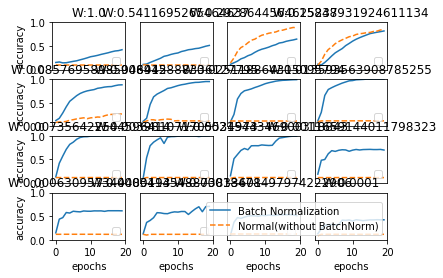

In [6]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.optimizer import SGD, Adam

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 学習データを削減
x_train = x_train[:1000]
t_train = t_train[:1000]

max_epochs = 20
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01


def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10, 
                                    weight_init_std=weight_init_std, use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10,
                                weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)
    
    train_acc_list = []
    bn_train_acc_list = []
    
    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0
    
    for i in range(1000000000):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]
    
        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)
    
        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)
    
            print("epoch:" + str(epoch_cnt) + " | " + str(train_acc) + " - " + str(bn_train_acc))
    
            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break
                
    return train_acc_list, bn_train_acc_list


# 3.グラフの描画==========
weight_scale_list = np.logspace(0, -4, num=16)
x = np.arange(max_epochs)

for i, w in enumerate(weight_scale_list):
    print( "============== " + str(i+1) + "/16" + " ==============")
    train_acc_list, bn_train_acc_list = __train(w)
    
    plt.subplot(4,4,i+1)
    plt.title("W:" + str(w))
    if i == 15:
        plt.plot(x, bn_train_acc_list, label='Batch Normalization', markevery=2)
        plt.plot(x, train_acc_list, linestyle = "--", label='Normal(without BatchNorm)', markevery=2)
    else:
        plt.plot(x, bn_train_acc_list, markevery=2)
        plt.plot(x, train_acc_list, linestyle="--", markevery=2)

    plt.ylim(0, 1.0)
    if i % 4:
        plt.yticks([])
    else:
        plt.ylabel("accuracy")
    if i < 12:
        plt.xticks([])
    else:
        plt.xlabel("epochs")
    plt.legend(loc='lower right')
    
plt.show()